In [4]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# TP bagging boosting

## Bagging

#### 1) Mettez en oeuvre le Bagging avec des arbres de profondeur 1 (en Anglais stumps), puis avec des arbres plus profonds, en partant du code ci-dessous. On pourra utiliser BaggingRegressor.

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
1
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

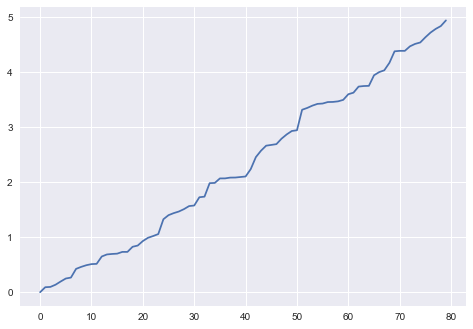

In [3]:
plt.plot(X)

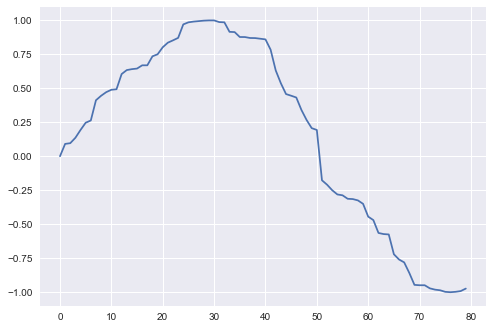

In [4]:
plt.plot(np.sin(X).ravel())

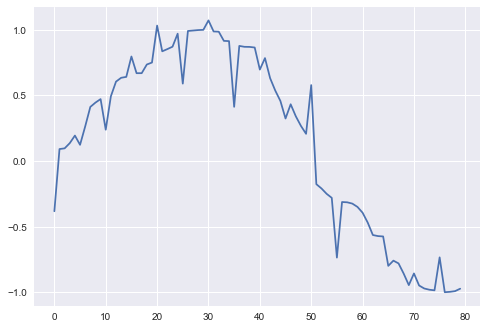

In [5]:
plt.plot(y)

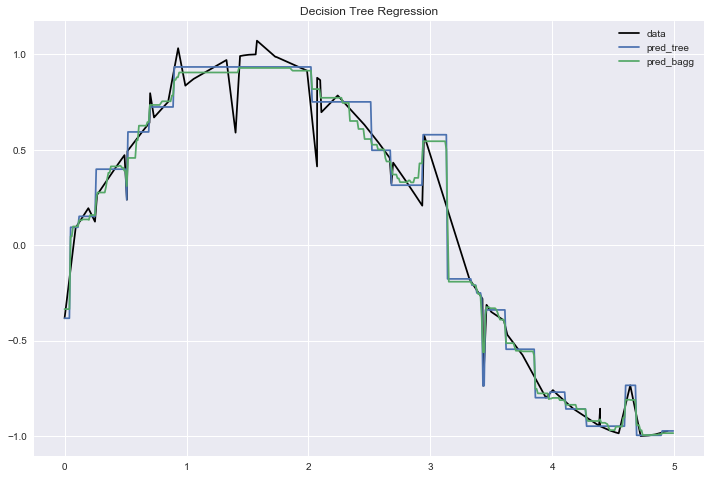

In [6]:
n_estimators = 10 # L in the text
tree_max_depth = 5
bagging_max_depth = 10

# The regressor by bagging stumps
tree = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
tree.fit(X, y)

tree1 = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
bagging = BaggingRegressor(base_estimator=tree1, n_estimators = n_estimators)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)



# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, c="k", label="data")
plt.plot(X_test, y_tree, label="pred_tree")

# TODO add plots for Bagging/Tree
plt.plot(X_test,y_bagging,label ="pred_bagg")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)

plt.show()

#### 2) Illustrer graphiquement le rôle de L ainsi que de la profondeur des arbres (max_depth).

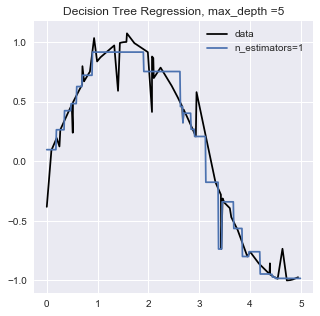

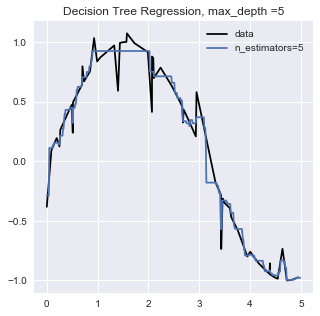

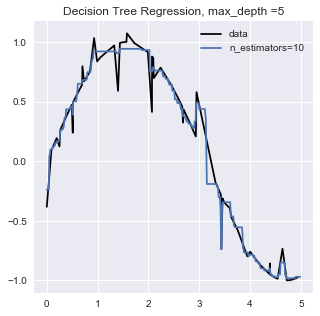

In [7]:

tree_max_depth=5

for n_estimators in [1,5,10]:
    
    #for tree_max_depth in [1,5,10]:
        
    # The regressor by bagging stumps
    tree = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
  
    bagging = BaggingRegressor(base_estimator=tree, n_estimators = n_estimators)
    bagging.fit(X, y)

    # Predict
    #y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    y_bagging = bagging.predict(X_test)

    # Plot the results
    plt.figure(figsize=(5, 5))
    plt.plot(X, y, c="k", label="data")

    # TODO add plots for Bagging/Tree
    plt.plot(X_test,y_bagging,label ="n_estimators=" + \
                          str(n_estimators)) 
    plt.title("Decision Tree Regression, max_depth =5")
    plt.legend(loc=1, numpoints=1)  

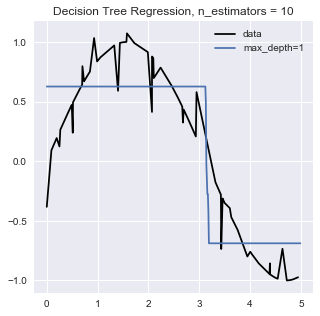

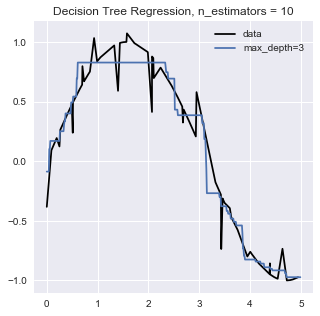

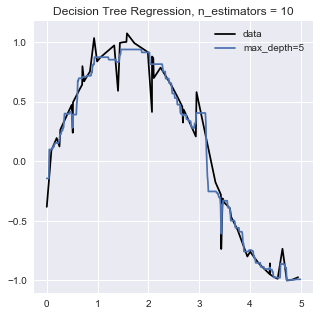

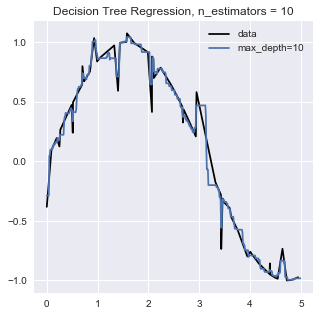

In [8]:
n_estimators = 10

for tree_max_depth in [1,3,5,10]:
        
    # The regressor by bagging stumps
    tree = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
  
    bagging = BaggingRegressor(base_estimator=tree, n_estimators = n_estimators)
    bagging.fit(X, y)

    # Predict
    #y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    y_bagging = bagging.predict(X_test)

    # Plot the results
    plt.figure(figsize=(5,5))
    plt.plot(X, y, c="k", label="data")

    # TODO add plots for Bagging/Tree
    plt.plot(X_test,y_bagging,label = "max_depth=" + str(tree_max_depth)) 
    plt.title("Decision Tree Regression, n_estimators = 10")
    plt.legend(loc=1, numpoints=1)
       

#### 3) A quoi reconnaît-on que les estimateurs construits par les arbres sont biaisés et que le bagging réduit leur variance ?

On diminue le sur apprentissage avec le bagging.

#### 4) En jouant sur le niveau de bruit mettez en évidence le sur-apprentissage.

In [9]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)

y = np.sin(X).ravel()
bruit = 2

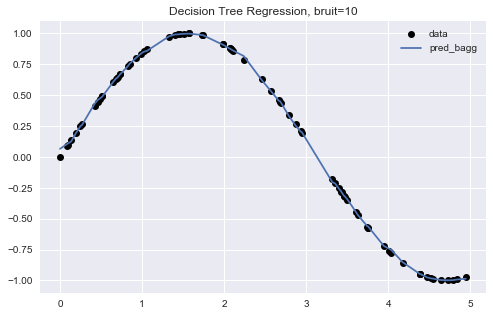

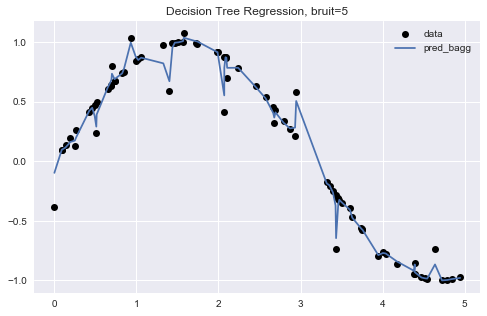

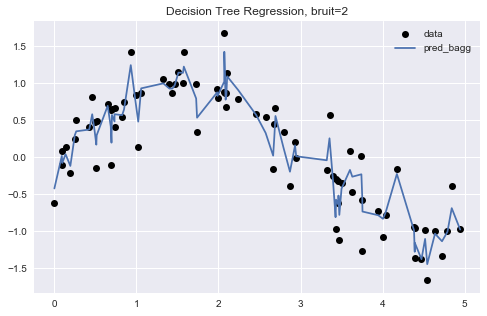

In [10]:
bruit = 2 # indicateur de bruit, décroissant (plus il est petit plus il y a de bruit
for bruit in [10,5,2]:
    # Create a random dataset
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    1
    y = np.sin(X).ravel()
    y[::bruit] += (10-bruit)/5 * (0.5 - rng.rand(int(len(X)/bruit)))
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    
    n_estimators = 10 # L in the text
    tree_max_depth = 10
    bagging_max_depth = 10
    
    # The regressor by bagging stumps
    tree = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
    tree.fit(X, y)
    
    tree1 = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
    bagging = BaggingRegressor(base_estimator=tree1, n_estimators = n_estimators)
    bagging.fit(X, y)
    
    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    y_bagging_train = bagging.predict(X)
    
    
    
    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(X, y, 'o', c="k", label="data")
    #plt.plot(X_test, y_tree, label="pred_tree")
    
    # TODO add plots for Bagging/Tree
    plt.plot(X,y_bagging_train, label ="pred_bagg")
    plt.title("Decision Tree Regression, bruit=" + str(bruit))
    plt.legend(loc=1, numpoints=1)
    
    plt.show()

#### 5) Observer qu’on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons bootstrap.

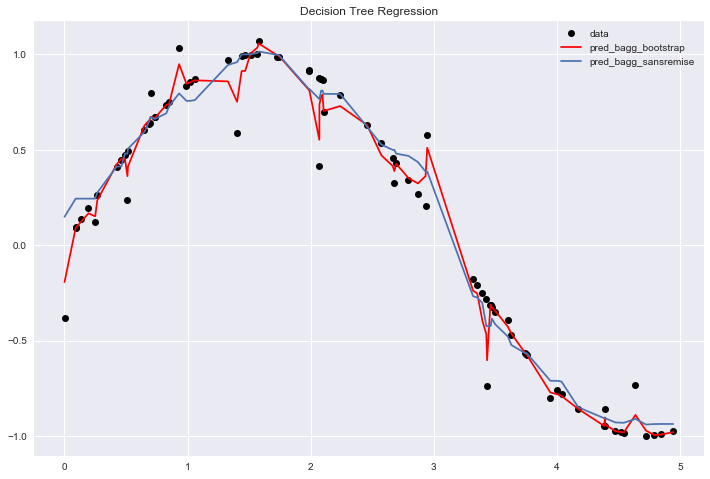

In [11]:
bruit = 5 # indicateur de bruit, décroissant (plus il est petit plus il y a de bruit


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
1
y = np.sin(X).ravel()
y[::bruit] += (10-bruit)/5 * (0.5 - rng.rand(int(len(X)/bruit)))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

# The regressor by bagging stumps
tree = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)
tree.fit(X, y)

tree1 = DecisionTreeRegressor(random_state=0,max_depth = tree_max_depth)

#tirage sans remise
bagging_sansremise = BaggingRegressor(base_estimator=tree1,max_samples=0.2, \
                                      n_estimators = n_estimators,bootstrap=False)
bagging_sansremise.fit(X, y)

#bootsrap 
bagging_bootstrap = BaggingRegressor(base_estimator=tree1,n_estimators = n_estimators,bootstrap=True)
bagging_bootstrap.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging_bootsrap_test = bagging_bootstrap.predict(X_test)
y_bagging_sansremise_test = bagging_sansremise.predict(X_test)

y_bagging_bootstrap_train = bagging_bootstrap.predict(X)
y_bagging_sansremise_train = bagging_sansremise.predict(X)


# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
#plt.plot(X, y_tree, label="pred_tree")

# Add plots for Bagging/Tree avec remise
plt.plot(X,y_bagging_bootstrap_train,c='r', label ="pred_bagg_bootstrap")

# Add plots for Bagging/Tree sans remise
plt.plot(X,y_bagging_sansremise_train, label ="pred_bagg_sansremise")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)

plt.show()

## Random forests

#### 6) Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez ces performances avec celles d’un SVM linéaire. On pourra utiliser :

In [1]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()
iris = datasets.load_iris()
digits = datasets.load_digits()
boston = datasets.load_boston()

In [2]:
X_digits=digits.data
y_digits=digits.target

X_iris=iris.data
y_iris=iris.target

X_diabetes=diabetes.data
y_diabetes=diabetes.target

X_boston=boston.data
y_boston=boston.target

In [14]:
rf_class = RandomForestClassifier()
print("Score iris rf, mean CV: ",cross_val_score(rf_class, X_iris, y_iris, cv=7).mean())
print("Score digits rf, mean CV: ",cross_val_score(rf_class, X_digits, y_digits, cv=7).mean())

rf_reg = RandomForestRegressor()
print("Score boston rf, mean CV: ",cross_val_score(rf_reg, X_boston, y_boston, cv=7).mean())
print("Score diabetes rf, mean CV: ",cross_val_score(rf_reg, X_diabetes, y_diabetes, cv=7).mean())

Score iris rf, mean CV:  0.960034013605
Score digits rf, mean CV:  0.897088788511
Score boston rf, mean CV:  0.571166905841
Score diabetes rf, mean CV:  0.333358645871


In [15]:
from sklearn.svm import SVC,SVR

svc = SVC()
print("Score iris rf, mean CV: ",cross_val_score(svc, X_iris, y_iris, cv=7).mean())
print("Score digits rf, mean CV: ",cross_val_score(svc, X_digits, y_digits, cv=7).mean())

svr = SVR()
print("Score boston rf, mean CV: ",cross_val_score(svr, X_boston, y_boston, cv=7).mean())
print("Score diabetes rf, mean CV: ",cross_val_score(svr, X_diabetes, y_diabetes, cv=7).mean())

Score iris rf, mean CV:  0.960034013605
Score digits rf, mean CV:  0.441100949059
Score boston rf, mean CV:  -0.49988414061
Score diabetes rf, mean CV:  -0.0487137209614


#### 7) En utilisant le dataset iris restreint aux deux premières variables explicatives afficher la probabilité de prédiction des classes. On partira du script suivant et on fera varier le nombre d’arbres aléatoires (variable n_estimators).

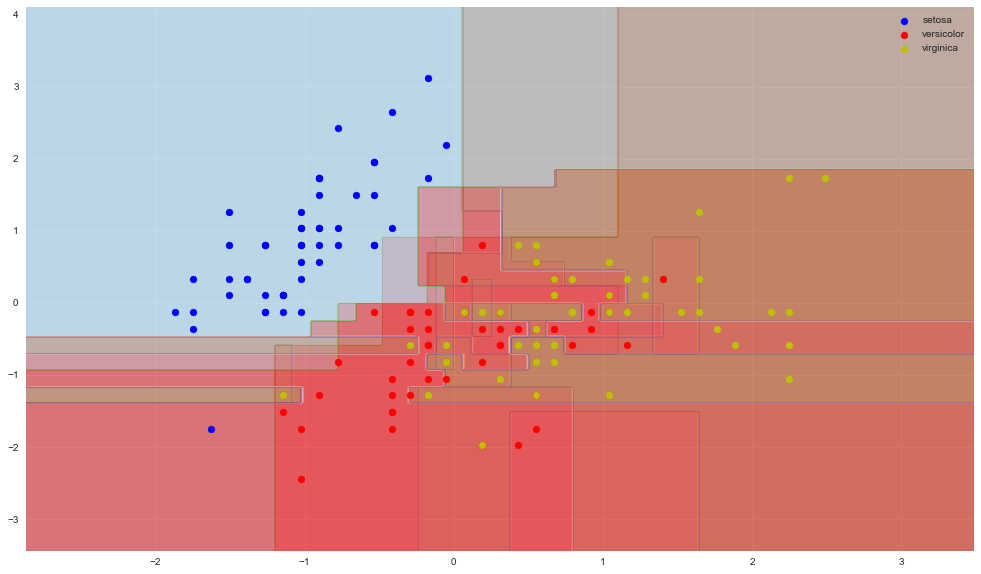

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Parameters
n_estimators = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.figure(figsize=(17,10))

for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
    Z=np.zeros(xx.shape)
    for i in range(xx.shape[1]):
        Z[:,i]= tree.predict(np.vstack((xx[:,i],yy[:,i])).T)
    
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")

for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
            cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

#### 8) Comparez les scores par 6-fold cross-validation des Random Forests et des arbres de décisions pures (obtenus avec DecisionTreeClassifier), sur le dataset iris restreint aux deux premières variables explicatives. On fera varier le paramètre max_depth entre 1 et 30. Mettre en évidence le fait que les Random Forests permettent de réduire le sur-apprentissage, et ce même pour des arbres profonds.

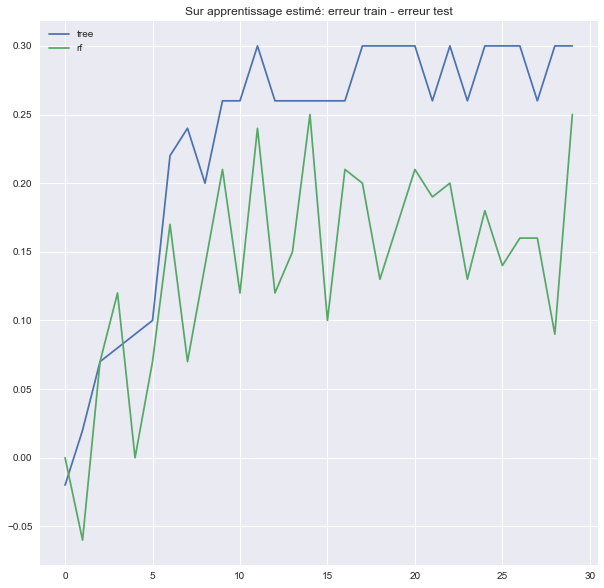

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
score_test_rf=[]
score_train_rf = []
for max_depth in range(1,31):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth)
    rf.fit(X_train,y_train)
    score_train_rf.append(rf.score(X_train,y_train))
    score_test_rf.append(rf.score(X_test,y_test))
    
score_test_tree=[]
score_train_tree = []
for max_depth in range(1,31):
    rf = DecisionTreeClassifier( max_depth = max_depth)
    rf.fit(X_train,y_train)
    score_train_tree.append(rf.score(X_train,y_train))
    score_test_tree.append(rf.score(X_test,y_test))
    
plt.figure(figsize=(10, 10))   
plt.plot(np.array(score_train_tree)-np.array(score_test_tree),label="tree")
plt.plot(np.array(score_train_rf)-np.array(score_test_rf),label="rf") 
plt.title("Sur apprentissage estimé: erreur train - erreur test")
plt.legend(loc=2, numpoints=1)

#### On observe que l'estimation du sur apprentissage est moindre dans le cas des random forests en augmentant la paramètre max_depth

#### 9) Démontrez la propriété suivante: Le minimiseur de  la fonction $f\to R_{\exp}(f)=\mathbb{E}[(\exp(-Yf(x))]$ est atteint en  $f^*_{\exp} =\frac{1}{2}\log (\frac{\eta(x)}{1-\eta(x)})$

$\mathbb{E}[(\exp(-Yf(X=x))] = \mathbb{P} (Y=1|x)\exp(-Yf(x)) + \mathbb{P} (Y=-1|X=x)\exp(Yf(x))$  <br><br>
En dérivant en en égalant à 0 on obtient :<br><br>
$-\mathbb{P} (Y=1|x)\exp(-f(x)) + \mathbb{P} (Y=-1|X=x)\exp(f(x))=0$<br><br>
$\Rightarrow f(x)=\frac{1}{2}\log(\frac{\eta(x)}{1-\eta(x)})$

#### 10) En déduire que le classifieur de Bayes associé au risque $R_{\exp}$ est le même que le classifieur de Bayes associé au risque $0/1$,$R_{\varphi_0}$.

$\frac{1}{2}\log(\frac{\eta(x)}{1-\eta(x)})>0\iff \eta(x)>\frac{1}{2}$<br><br>

#### 11) Montrer que la  solution du dernier programme d'optimisation est: $c_m =\frac{1}{2} \log\left[\frac{{\mathbb{P}}_{w^{m-1}}(Y= \hat{h}_m(X))}{{\mathbb{P}}_{w^{m-1}}(Y \neq \hat{h}_m(X))} \right]$

$\mathbb{E}_{\omega^{m-1}} \left[\exp(-c\cdot Y\cdot \hat{h}_m(X)) \right] = \mathbb{P}_{w^{m-1}} (Y=\hat{h}_m(X)|x)\exp(-c) +\mathbb{P}_{w^{m-1}} (Y\neq\hat{h}_m(X)|X=x)\exp(c)$<br><br>
En dérivant en en égalant à 0 on obtient :<br><br>
$\mathbb{P}_{w^{m-1}} (Y\neq\hat{h}_m(X)|x)\exp(-c) - \mathbb{P}_{w^{m-1}} (Y=\hat{h}_m(X)|x)\exp(c)=0$<br><br>
$\Rightarrow c =\frac{1}{2}\log(\frac{\mathbb{P}_{w^{m-1}} (Y=\hat{h}_m(X)|x)}{\mathbb{P}_{w^{m-1}} (Y\neq\hat{h}_m(X)|x)})$

## Adaboost 

#### 13) Mettre en oeuvre AdaBoost avec des arbres de profondeur 1, puis 2, puis 10, sur le jeu de données digits. On calculera notamment la précision obtenue par 6-fold cross-validation. On pourra utiliser par exemple

In [23]:
from sklearn.ensemble import AdaBoostClassifier

Ada_1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 1))
Ada_2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2))
Ada_10 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10))

print('CV 6 fold score adaboost, maxdepth 1 :  ', cross_val_score(Ada_1, X_digits, y_digits, cv=6).mean())
print('CV 6 fold score adaboost, maxdepth 2 :  ', cross_val_score(Ada_2, X_digits, y_digits, cv=6).mean())
print('CV 6 fold score adaboost, maxdepth 10 :  ', cross_val_score(Ada_10, X_digits, y_digits, cv=6).mean())


CV 6 fold score adaboost, maxdepth 1 :   0.264185069675
CV 6 fold score adaboost, maxdepth 2 :   0.595884018572
CV 6 fold score adaboost, maxdepth 10 :   0.956060206802


#### 14) Appliquer AdaBoost sur les données digits découpées en deux échantillons : apprentissage (75%) et test (25%). Tracer les erreurs (0/1) d’apprentissage et de test en fonction du nombre d’itérations.

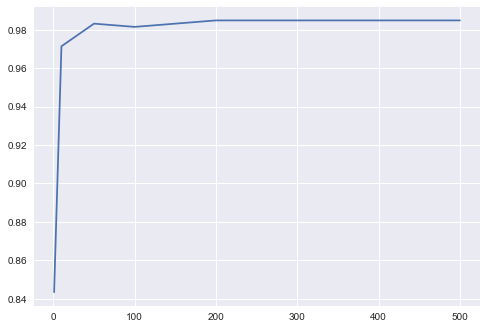

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

score = []
maxdepth = 10

for iter in [1,10,50,100,200,500]:
    
    Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=maxdepth),n_estimators=iter)
    adafit = Ada.fit(X_train,y_train)
    score.append(adafit.score(X_test,y_test))
    
plt.plot([1,10,50,100,200,500],score)  

#### 15) Que remarquez vous ? Que se passe-t-il si la profondeur des arbres de classification est grande ?

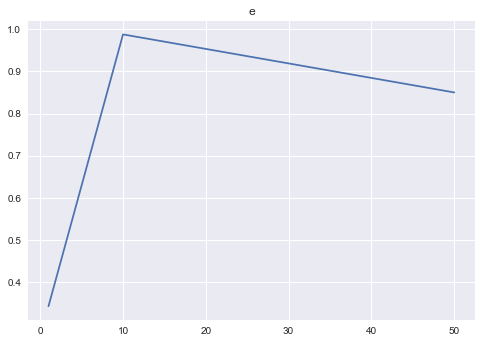

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

score = []
n_iter = 50

for maxdepth in [1,10,50]:
    
    Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=maxdepth),n_estimators=n_iter)
    adafit = Ada.fit(X_train,y_train)
    score.append(adafit.score(X_test,y_test))
    
plt.plot([1,10,50],score) 
plt.title('adaboost, niter = 50')

On remarque que on attend un maximum au bout de 50 itérations à maxdepth fixée.
On remarque en faisant varier maxdepth et en gardant ntree fixe un maximum (ici à une max depth de 10).
Il s'agit donc de trouver 
Trois différents comportements peuvent être mis en évidence en faisant varier la profondeur des arbres:
- Quand la est profondeur faible (depth<10), il faut un très grand nombre d'estimateurs pour que le modèle converge.
- Quand la profondeur augmente (depth=10), l'algorithme converge très rapidement.
- Quand la profondeur est très grande (depth>10), la performance baisse de façon significative, l'algorithme ne converge plus et n'arrive plus à généraliser.


#### 16) (Question Bonus) : Implémenter vous-même l’algorithme AdaBoost.

In [ ]:
def adaboost(X,y,n_classifieur,maxdepth):
    w0 = np.repeat(1/(len(X)),len(X))
    tree = DecisionTreeClassifier(max_depth=maxdepth)
    adafit0 = tree.fit(X,y)
    
    